Uso de software para búsqueda. Axel Moisés Espinoza Lindoro. 2002721. N4

In [6]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [3]:
#Importar datos
mnist_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
(train_images, train_labels), (test_images, test_labels) = mnist_data

Cargar el conjunto de datos devuelve cuatro arreglos NumPy:

- Los arreglos `train_images` y `train_labels` constituyen el *conjunto de entrenamiento*, los datos que el modelo usa para aprender.
- El modelo se compara con el *conjunto de prueba*, los arreglos `test_images`, y `test_labels`.

Las imágenes son arreglos NumPy de 28x28, con valores de píxeles que van de 0 a 255. Las *letiquetas* son un arreglo de números enteros, que van de 0 a 9. Estos corresponden a la *clase* de prenda de vestir que representa la imagen:

<table>
  <tr>
    <th>Etiqueta</th>
    <th>Clase</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen se asigna a una etiqueta única. Dado que los *nombres de las clases* no se incluyen en los conjuntos de datos, almacénelos aquí para usarlos más tarde, al trazar las imágenes:

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

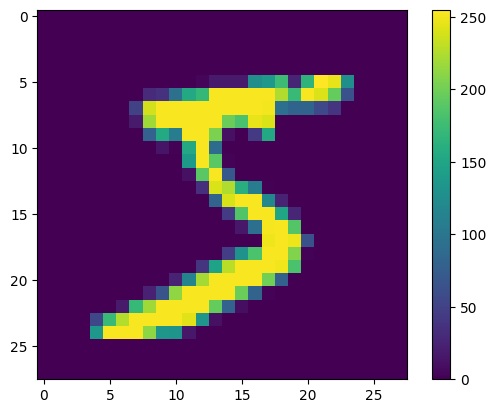

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

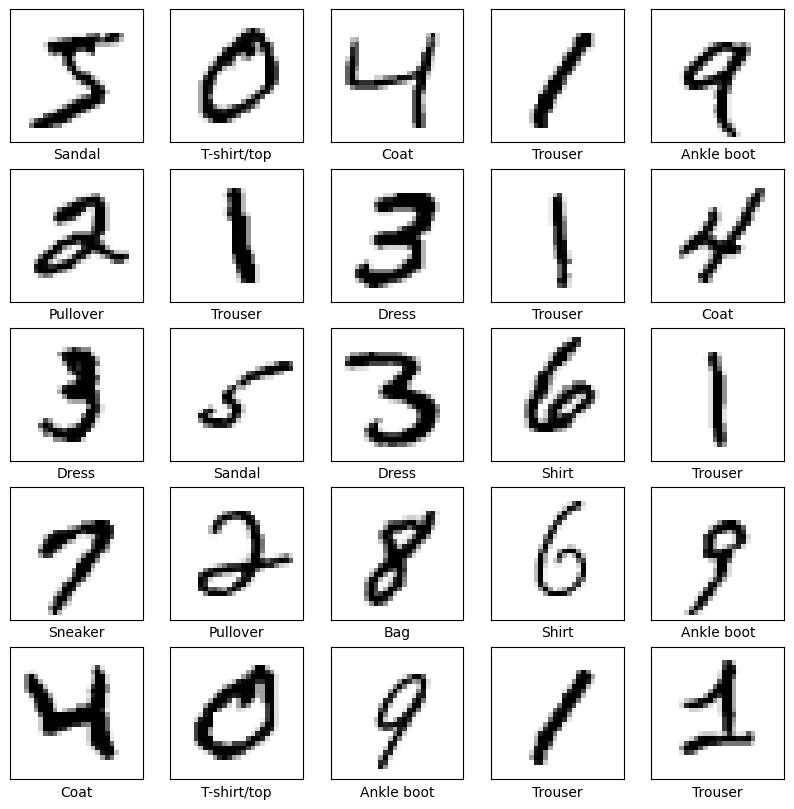

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2552 - accuracy: 0.9270
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1108 - accuracy: 0.9668
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0760 - accuracy: 0.9771
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0567 - accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0442 - accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0355 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0285 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0230 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0186 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.016

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0937 - accuracy: 0.9757 - 614ms/epoch - 2ms/step

Test accuracy: 0.9757000207901001


In [18]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [20]:
predictions[0]

array([9.7755797e-12, 3.0007129e-11, 3.1085847e-07, 4.3418138e-05,
       1.1642546e-13, 2.3750829e-10, 1.5215480e-16, 9.9994427e-01,
       4.3823878e-08, 1.1904264e-05], dtype=float32)

In [21]:
np.argmax(predictions[0])

7

In [22]:
test_labels[0]

7

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

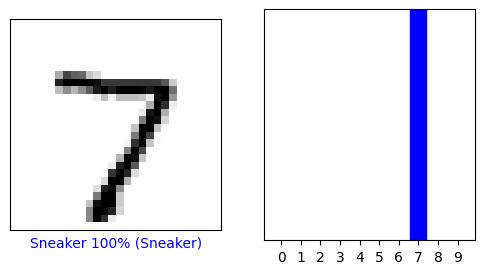

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

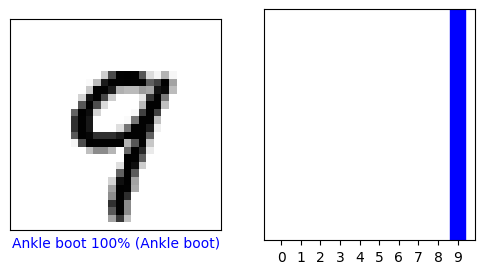

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

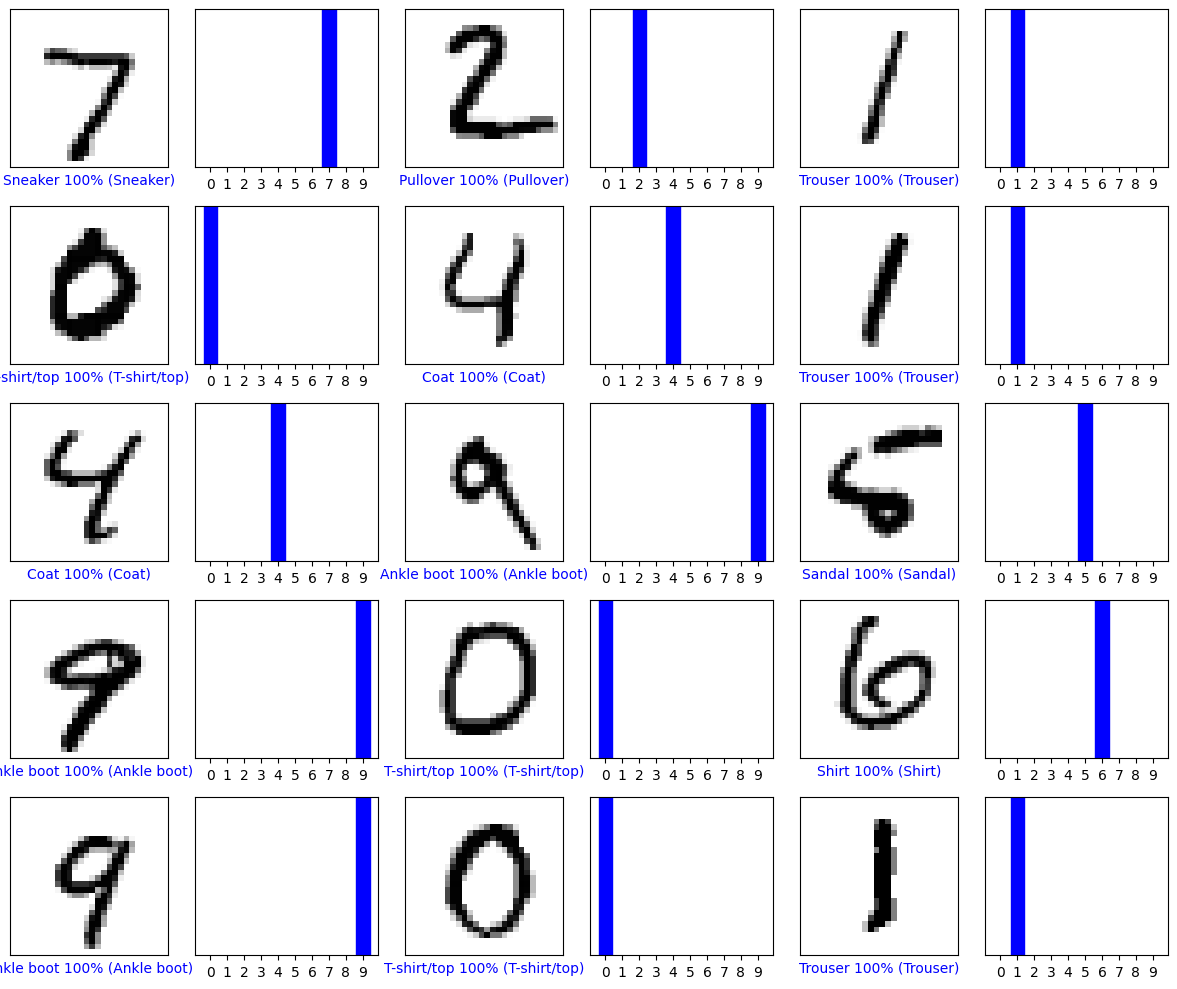

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 20ms/step
[[1.5434607e-12 1.1810934e-06 9.9999881e-01 9.4282548e-10 6.5319452e-21
  3.9274952e-09 1.1989583e-10 5.7140070e-19 1.5724925e-08 3.7557557e-17]]


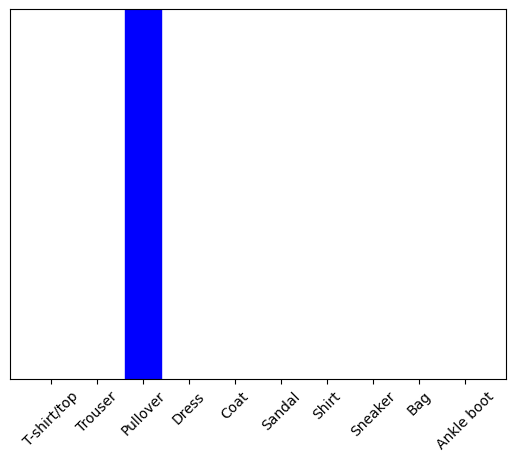

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [31]:
np.argmax(predictions_single[0])

2